# Task-7

# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Details of the Dataset

In [3]:
df = pd.read_csv('d:\Murtaza\Elevvo internship\Tasks\Task 7\walmart sales forecast.csv')
df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
df.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [6]:
df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [8]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, explorative=True)

# OR display inside a Jupyter Notebook
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 26.04it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data cleaning

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
n_null_dates = df['date'].isna().sum()
print(f"Rows with missing dates: {n_null_dates}")

df = df.dropna(subset=['date','weekly_sales'])
df['weekly_sales'] = pd.to_numeric(df['weekly_sales'], errors='coerce')
df = df.dropna(subset=['weekly_sales'])

print("\nAfter cleaning shape:", df.shape)
df.head()

KeyError: 'date'

# Aggregate to monthly

In [ ]:
monthly = df.set_index('date').resample('ME').weekly_sales.sum().rename('monthly_sales').to_frame()
monthly['month'] = monthly.index.month
monthly['year'] = monthly.index.year

# Moving averages
monthly['MA_3'] = monthly['monthly_sales'].rolling(window=3).mean()
monthly['MA_12'] = monthly['monthly_sales'].rolling(window=12).mean()
monthly['trend_12'] = monthly['monthly_sales'].rolling(window=12, center=True, min_periods=6).mean()
monthly['detrended'] = monthly['monthly_sales'] - monthly['trend_12']

# Visualization

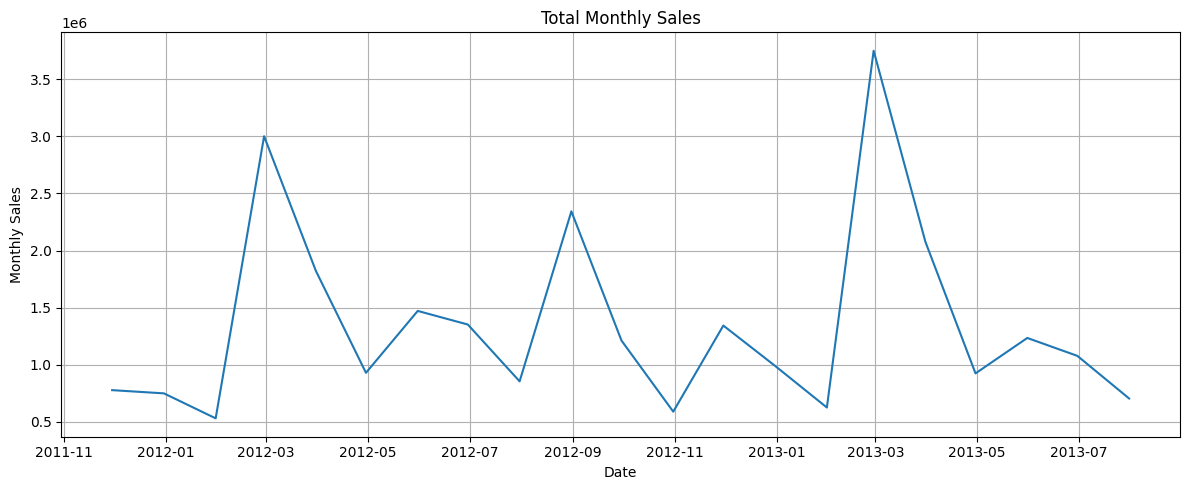

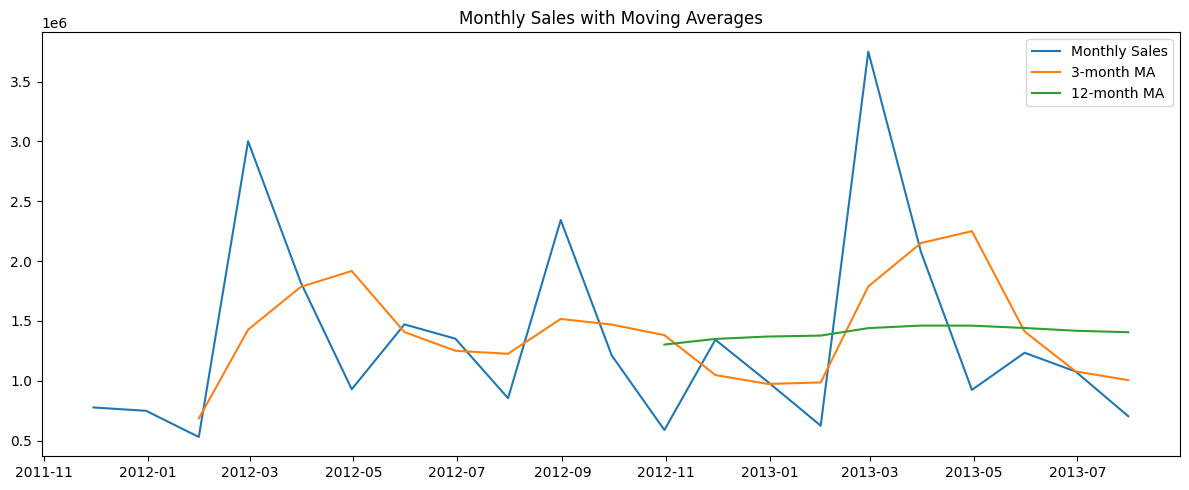

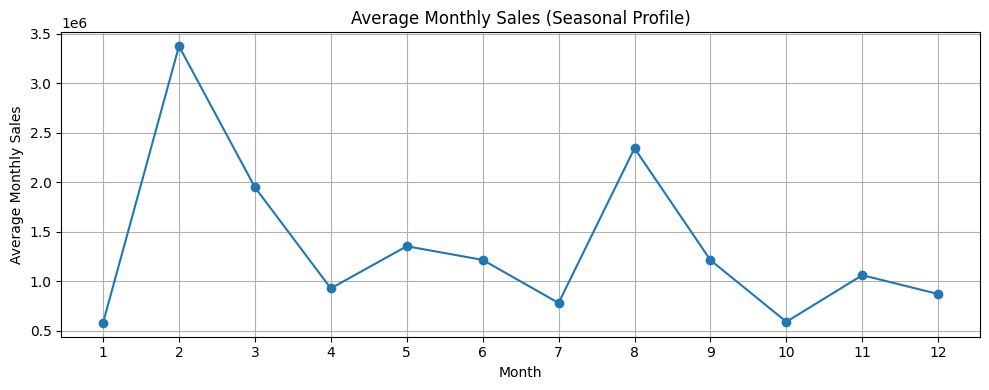

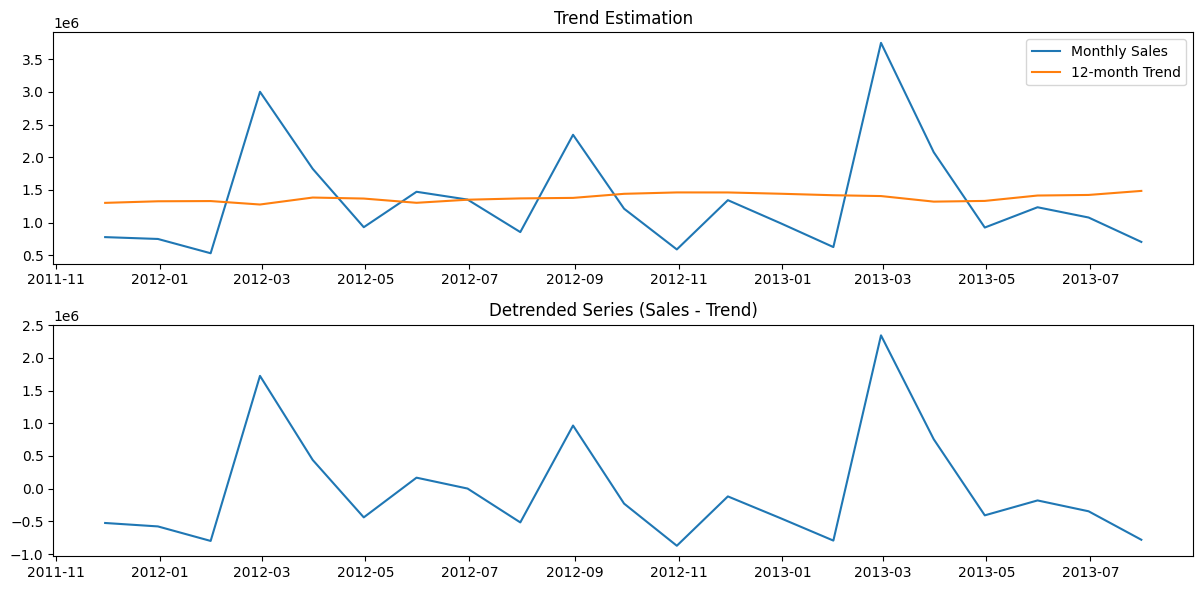

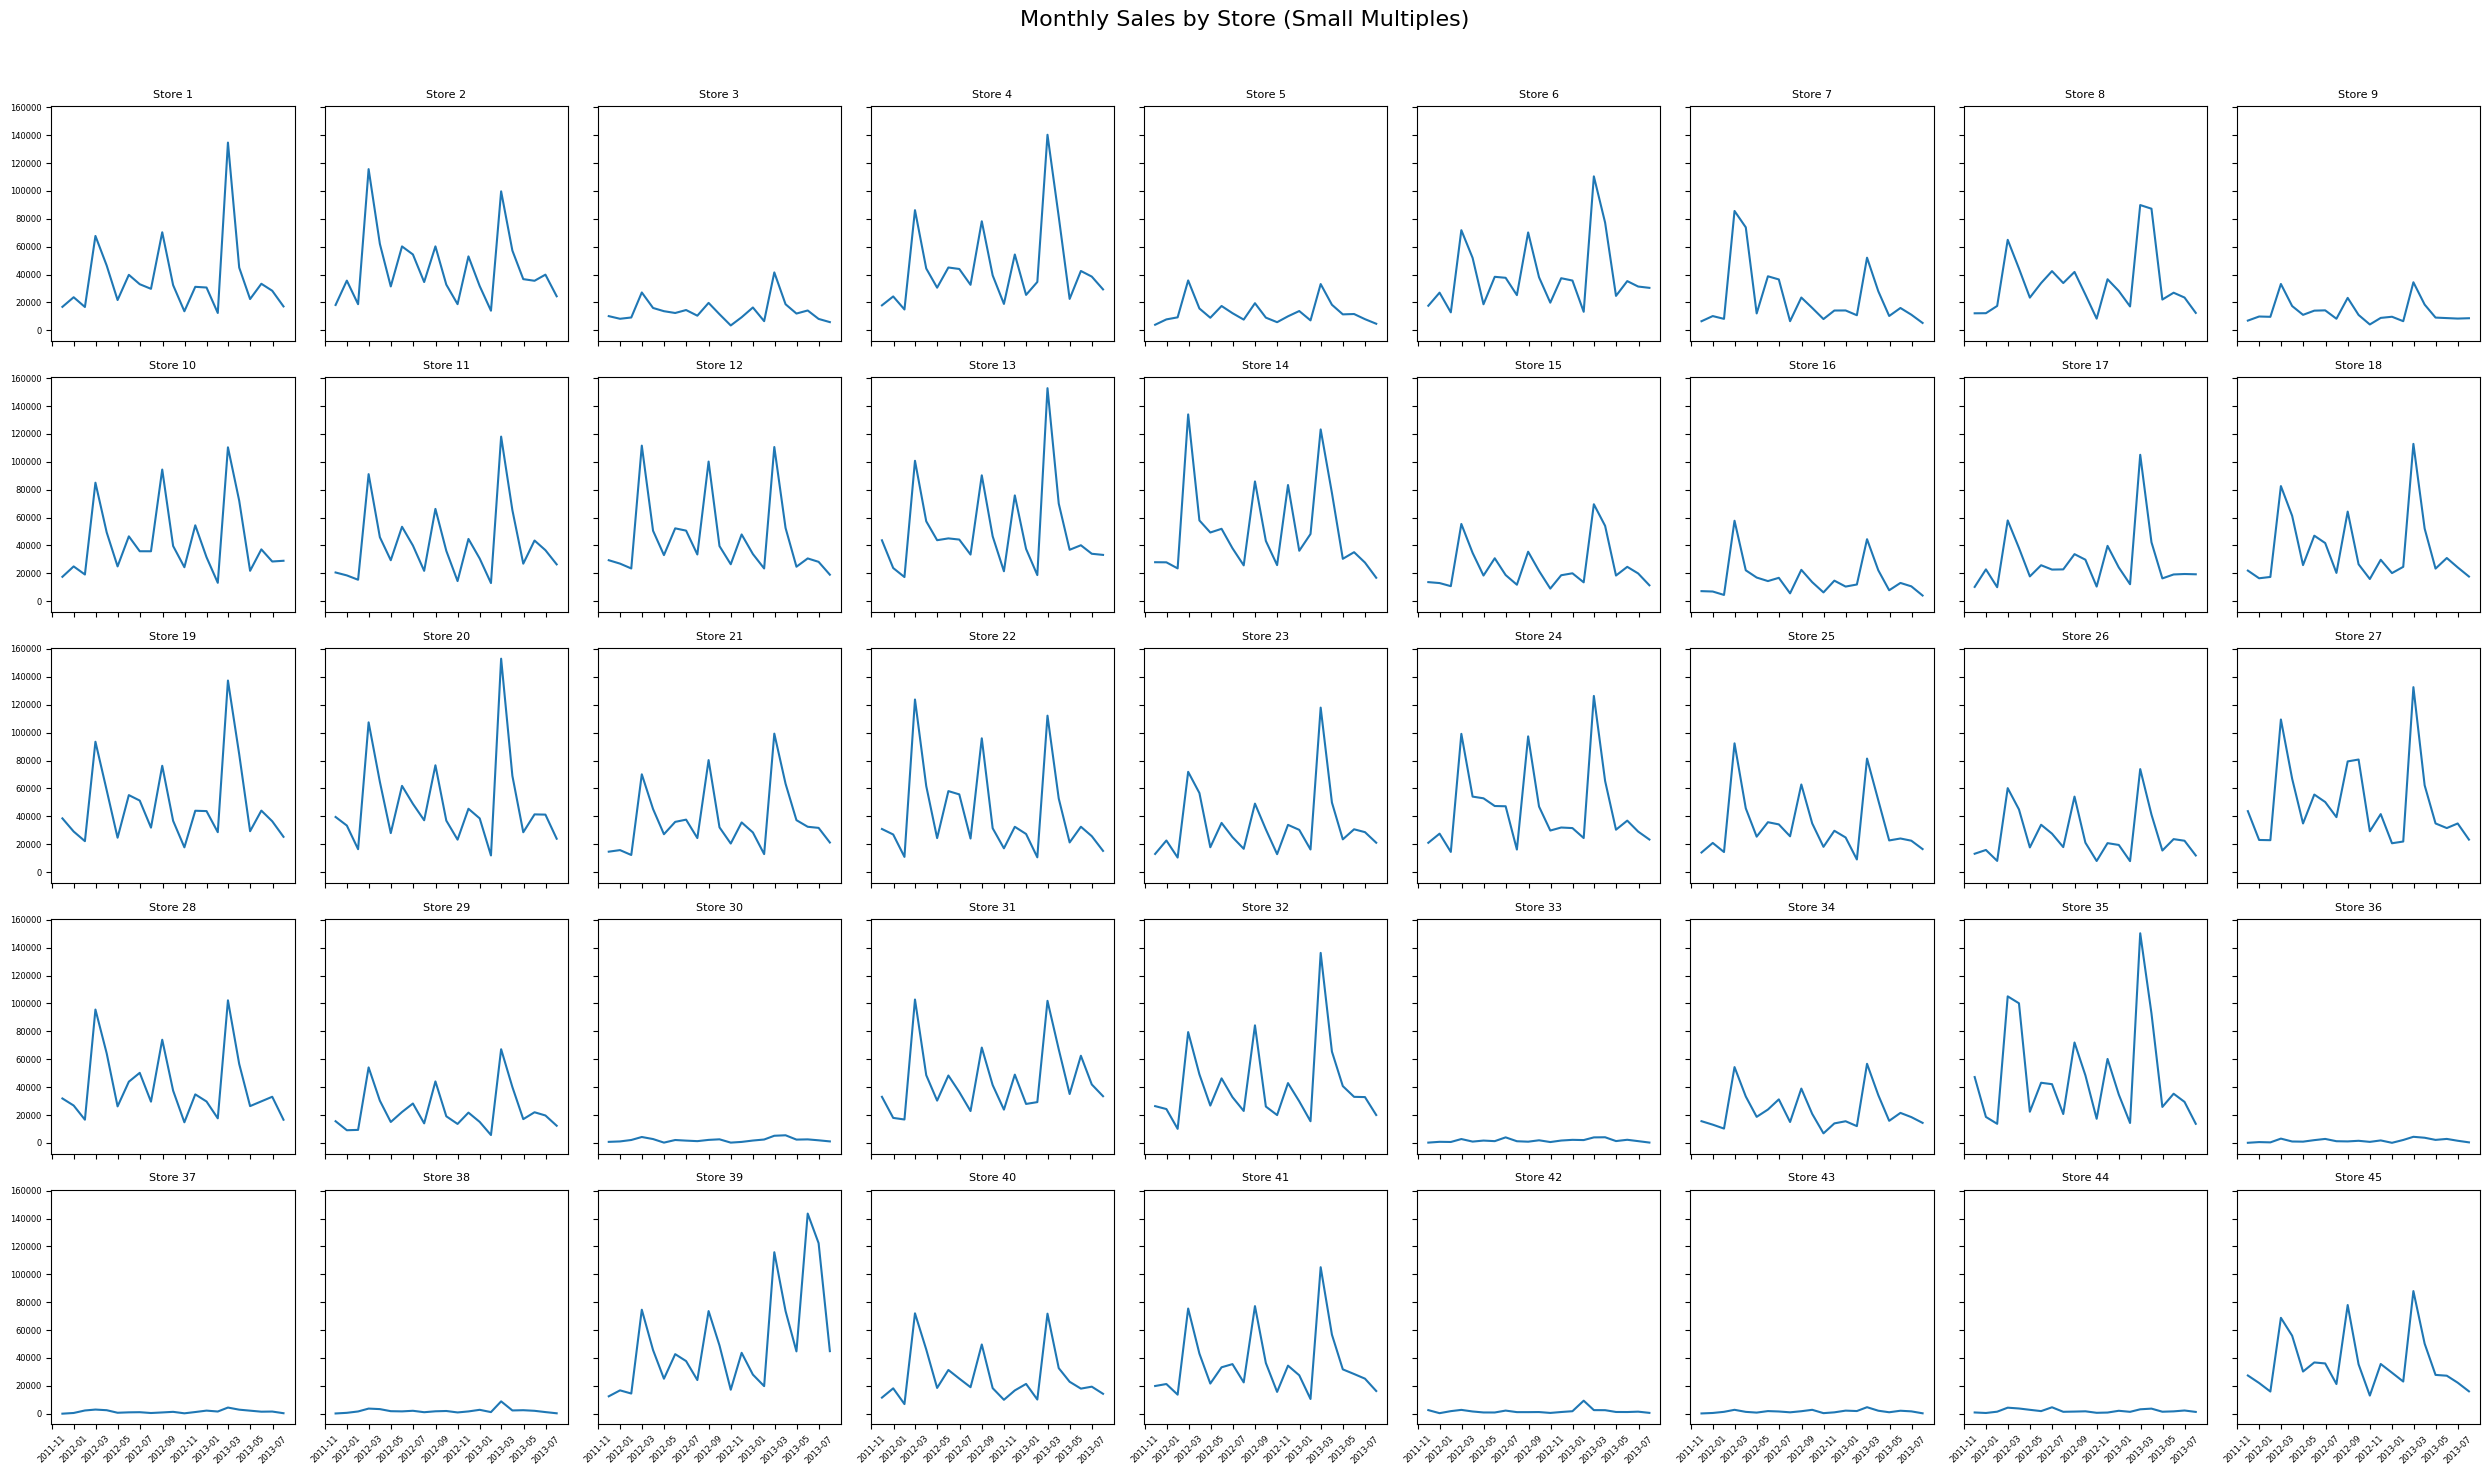

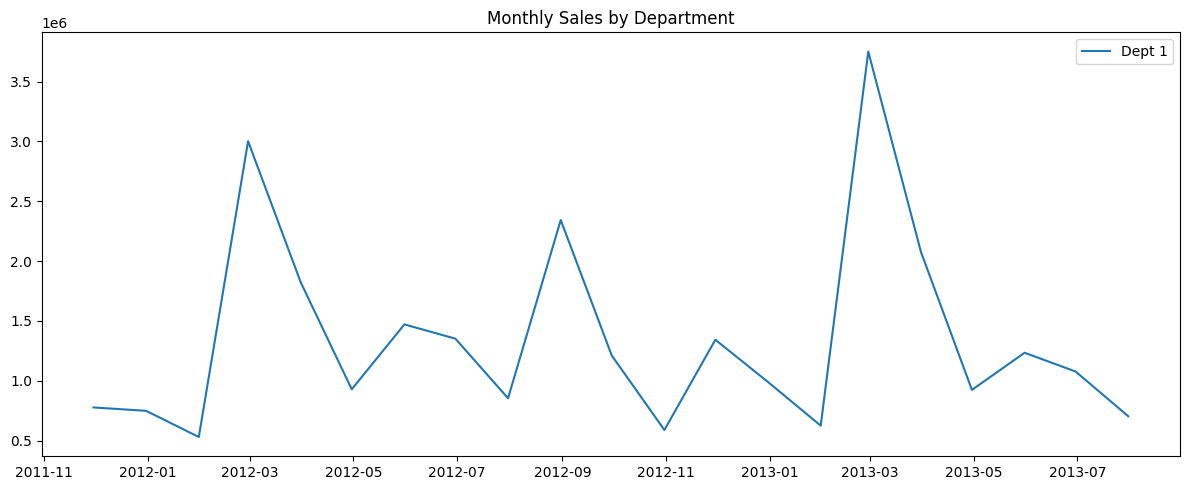

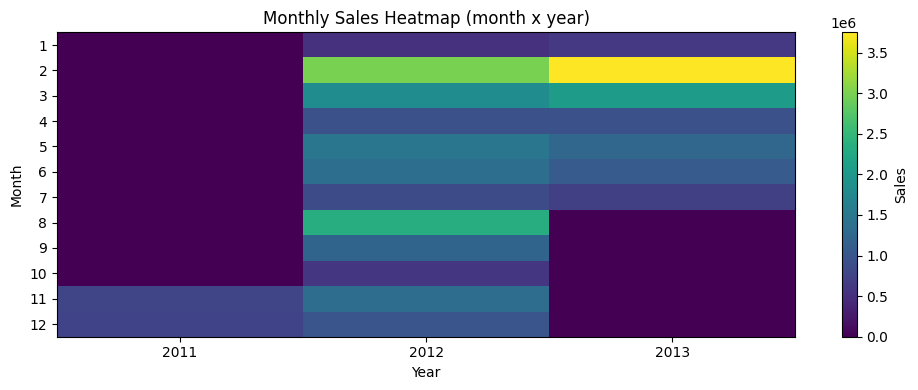

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly['monthly_sales'], label='Monthly Sales')
plt.title('Total Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



# Seasonal profile
seasonal_profile = monthly.groupby('month').monthly_sales.mean()
plt.figure(figsize=(10,4))
plt.plot(seasonal_profile.index, seasonal_profile.values, marker='o')
plt.title('Average Monthly Sales (Seasonal Profile)')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.ylabel('Average Monthly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Trend + detrended
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(monthly.index, monthly['monthly_sales'], label='Monthly Sales')
plt.plot(monthly.index, monthly['trend_12'], label='12-month Trend')
plt.legend()
plt.title('Trend Estimation')
plt.subplot(2,1,2)
plt.plot(monthly.index, monthly['detrended'])
plt.title('Detrended Series (Sales - Trend)')
plt.tight_layout()
plt.show()

# Breakdown by store(Region) and dept(Product)
agg_store = df.set_index('date').groupby([pd.Grouper(freq='ME'), 'store']).weekly_sales.sum().unstack('store').fillna(0)
agg_dept = df.set_index('date').groupby([pd.Grouper(freq='ME'), 'dept']).weekly_sales.sum().unstack('dept').fillna(0)

agg_store = df.set_index('date').groupby([pd.Grouper(freq='ME'), 'store']).weekly_sales.sum().reset_index()

fig, axes = plt.subplots(5, 9, figsize=(25, 15), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each store separately
for i, store in enumerate(sorted(agg_store['store'].unique())):
    store_data = agg_store[agg_store['store'] == store]
    axes[i].plot(store_data['date'], store_data['weekly_sales'], color='tab:blue')
    axes[i].set_title(f"Store {store}", fontsize=8)
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=6)
    axes[i].tick_params(axis='y', labelsize=6)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Monthly Sales by Store (Small Multiples)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


plt.figure(figsize=(12,5))
for c in agg_dept.columns:
    plt.plot(agg_dept.index, agg_dept[c], label=f'Dept {c}')
plt.title('Monthly Sales by Department')
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap-like pivot
monthly_by_ym = df.copy()
monthly_by_ym['year'] = monthly_by_ym['date'].dt.year
monthly_by_ym['month'] = monthly_by_ym['date'].dt.month
pivot = monthly_by_ym.groupby(['year','month']).weekly_sales.sum().unstack(level=0).fillna(0)

plt.figure(figsize=(10,4))
plt.imshow(pivot.values, aspect='auto')
plt.yticks(ticks=np.arange(12), labels=np.arange(1,13))
plt.xticks(ticks=np.arange(pivot.shape[1]), labels=pivot.columns)
plt.title('Monthly Sales Heatmap (month x year)')
plt.colorbar(label='Sales')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly['monthly_sales'], label='Monthly Sales')
plt.plot(monthly.index, monthly['MA_3'], label='3-month MA')
plt.plot(monthly.index, monthly['MA_12'], label='12-month MA')
plt.legend()
plt.title('Monthly Sales with Moving Averages')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

# Forecasting for next 12 months


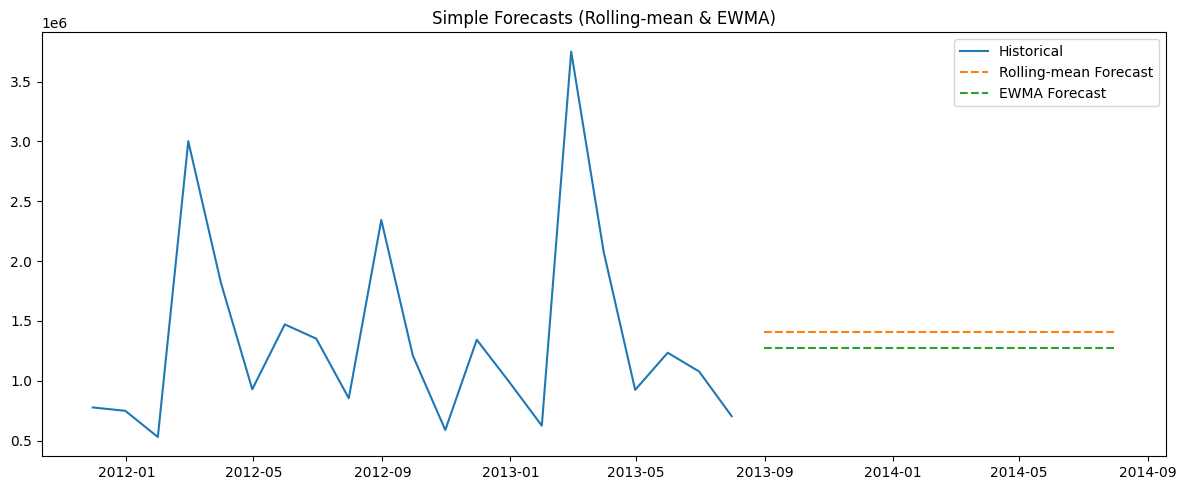

rolling_mean_forecast  ewm_forecast
2013-08-31           1.405659e+06  1.270531e+06
2013-09-30           1.405659e+06  1.270531e+06
2013-10-31           1.405659e+06  1.270531e+06
2013-11-30           1.405659e+06  1.270531e+06
2013-12-31           1.405659e+06  1.270531e+06
2014-01-31           1.405659e+06  1.270531e+06
2014-02-28           1.405659e+06  1.270531e+06
2014-03-31           1.405659e+06  1.270531e+06
2014-04-30           1.405659e+06  1.270531e+06
2014-05-31           1.405659e+06  1.270531e+06
2014-06-30           1.405659e+06  1.270531e+06
2014-07-31           1.405659e+06  1.270531e+06

In [ ]:
last_date = monthly.index.max()
future_periods = 12
future_idx = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=future_periods, freq='ME')

mean_12 = monthly['monthly_sales'].tail(12).mean()
rolling_forecast = pd.Series([mean_12]*future_periods, index=future_idx)

alpha = 0.2
exp_smoothed = monthly['monthly_sales'].ewm(alpha=alpha).mean()
last_ewm = exp_smoothed.iloc[-1]
ewm_forecast = pd.Series([last_ewm]*future_periods, index=future_idx)

plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly['monthly_sales'], label='Historical')
plt.plot(rolling_forecast.index, rolling_forecast.values, linestyle='--', label='Rolling-mean Forecast')
plt.plot(ewm_forecast.index, ewm_forecast.values, linestyle='--', label='EWMA Forecast')
plt.legend()
plt.title('Simple Forecasts (Rolling-mean & EWMA)')
plt.tight_layout()
plt.show()

forecast_df = pd.DataFrame({'rolling_mean_forecast': rolling_forecast, 'ewm_forecast': ewm_forecast})
forecast_df

Findings

Overall Sales Trends

    Total sales showed significant seasonal fluctuations, with recurring peaks during the end-of-year holiday season (November–December).
    A 3-month moving average smoothed the short-term volatility, clearly highlighting long-term growth trends and seasonal cycles.
    Detrended analysis revealed that seasonal effects are the primary drivers of fluctuations rather than long-term decline or growth.

Seasonality and Patterns

    The seasonal decomposition confirmed strong yearly seasonality, particularly elevated sales in December.
    A heatmap (month × year) illustrated consistently high sales at year-end across all years, with weaker sales during summer months.
    This suggests that promotions and stock planning should be concentrated around Q4 to maximise revenue.

Store-Level Insights
    
    Analysis across 45 stores showed that while seasonal patterns were broadly similar, sales volumes varied widely.
    A small multiple plot of all stores revealed that a handful of stores contributed disproportionately to total revenue, whereas others maintained relatively stable but lower sales.
    Top 5 stores significantly outperformed the rest, while the bottom 5 stores consistently lagged behind, suggesting differences in store size, location, or customer base.

Department-Level Insights

    Department-wise analysis showed clear leaders: a few departments consistently accounted for the bulk of sales.
    The top 10 departments had highly seasonal patterns, with strong holiday peaks.
    The bottom 10 departments contributed minimally, with relatively flat sales trends.
    This indicates that focusing resources (promotions, inventory) on top-performing departments during peak periods can drive disproportionate revenue growth.